In [1]:
from heapq import merge

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

#from rope.base.oi.soa import analyze_module
from scipy.stats import linregress
import libraries as lib

In [3]:
# Voorbeeld van hoe je de functie kunt aanroepen
directory = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240701_20240707_monaco/20240705_endurance/0197 - 20240705T112922 4h42m28s 12.770km Monte-Carlo - Saint-Roman - Monte-Carlo"
result = lib.DataUitzoekenGui(directory)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_05.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [21]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result:
    merged_df = result['merged_df']
    # Gebruik merged_df zoals je wilt
    display(merged_df)
else:
    print("De data is nog niet geladen.")


,Datalogger port_x,"Dataloggertijd, in s_x","MPPT-tijd, in s_x","Paneel 1 ingangsstroom, in I_x","Paneel 1 instantaan ingangsvermogen, in W_x","Paneel 1 totale ingangsenergie, in J_x","Paneel 2 ingangsspanning, in V_x","Paneel 2 ingangsstroom, in I_x","Paneel 2 instantaan ingangsvermogen, in W_x","Paneel 2 totale ingangsenergie, in J_x",...,Board Temperature,Format header (>08|05),Tijd,Status,Latitude,Noord of Zuid (N/S),Longitude,Oost of West (E/W),Magnetische directie,Mode indicator (D)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:47,2.0,47.098139,54.299504,-0.015071,-0.627518,-19.036529,23.642471,-0.006576,-0.263671,-7.838106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:48,2.0,48.003309,55.204654,-0.015000,-0.625427,-19.362827,23.641273,-0.006682,-0.277627,-7.981773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:49,2.0,49.006987,56.208318,-0.015096,-0.626077,-19.724692,23.640192,-0.006663,-0.290913,-8.132875,...,34.5,08|05,092923.000,A,4344.2300,N,00725.6064,E,None,D
0 days 00:00:50,2.0,50.007589,57.208904,-0.015140,-0.627692,-20.086280,23.639794,-0.006729,-0.280832,-8.298551,...,34.4,08|05,092924.000,A,4344.2300,N,00725.6067,E,None,D
0 days 00:00:51,2.0,50.994165,58.195450,-0.015202,-0.634471,-20.446452,23.639471,-0.006769,-0.284923,-8.463462,...,34.4,08|05,092925.000,A,4344.2300,N,00725.6067,E,None,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 04:43:34,2.0,17013.998925,17020.839909,-0.010152,-0.432869,418335.651212,25.043172,-0.002525,-0.103960,406039.552121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 04:43:35,2.0,17014.998784,17021.839707,-0.010273,-0.436394,418335.391515,25.046970,-0.002485,-0.109263,406039.477879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 04:43:36,2.0,17015.998655,17022.839616,-0.010485,-0.440404,418335.127980,25.033172,-0.002343,-0.107091,406039.409091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Convert 'Latitude' and 'Longitude' to numeric, setting errors='coerce' to convert non-numeric values to NaN
merged_df['Latitude'] = pd.to_numeric(merged_df['Latitude'], errors='coerce')
merged_df['Longitude'] = pd.to_numeric(merged_df['Longitude'], errors='coerce')
merged_df['Snelheid over de grond in km/h'] = pd.to_numeric(merged_df['Snelheid over de grond in km/h'], errors='coerce')
merged_df['Discharge 1 stroom'] = pd.to_numeric(merged_df['Discharge 1 stroom'], errors='coerce')
merged_df['Discharge 1 spanning'] = pd.to_numeric(merged_df['Discharge 1 spanning'], errors='coerce')

# Filter out rows where 'Latitude' or 'Longitude' is NaN
merged_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

# Filter rows where 'Latitude' is between 4300 and 4400 and 'Longitude' is between 700 and 800
filtered_df = merged_df[(merged_df['Latitude'] >= 4300) &
                        (merged_df['Latitude'] <= 4400) &
                        (merged_df['Longitude'] >= 700) &
                        (merged_df['Longitude'] <= 800) &
                        (merged_df['Snelheid over de grond in km/h'] >= 0) &
                        (merged_df['Snelheid over de grond in km/h'] <= 50)]
filtered_df

,Datalogger port_x,"Dataloggertijd, in s_x","MPPT-tijd, in s_x","Paneel 1 ingangsstroom, in I_x","Paneel 1 instantaan ingangsvermogen, in W_x","Paneel 1 totale ingangsenergie, in J_x","Paneel 2 ingangsspanning, in V_x","Paneel 2 ingangsstroom, in I_x","Paneel 2 instantaan ingangsvermogen, in W_x","Paneel 2 totale ingangsenergie, in J_x",...,Board Temperature,Format header (>08|05),Tijd,Status,Latitude,Noord of Zuid (N/S),Longitude,Oost of West (E/W),Magnetische directie,Mode indicator (D)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:49,2.0,49.006987,56.208318,-0.015096,-0.626077,-19.724692,23.640192,-0.006663,-0.290913,-8.132875,...,34.5,08|05,092923.000,A,4344.2300,N,725.6064,E,None,D
0 days 00:00:50,2.0,50.007589,57.208904,-0.015140,-0.627692,-20.086280,23.639794,-0.006729,-0.280832,-8.298551,...,34.4,08|05,092924.000,A,4344.2300,N,725.6067,E,None,D
0 days 00:00:51,2.0,50.994165,58.195450,-0.015202,-0.634471,-20.446452,23.639471,-0.006769,-0.284923,-8.463462,...,34.4,08|05,092925.000,A,4344.2300,N,725.6067,E,None,D
0 days 00:00:52,2.0,52.000039,59.201312,-0.015101,-0.631422,-20.811853,23.639661,-0.006826,-0.277651,-8.630440,...,34.4,08|05,092926.000,A,4344.2300,N,725.6067,E,None,D
0 days 00:00:53,2.0,52.994510,60.195757,-0.015147,-0.632092,-21.175440,23.639633,-0.006394,-0.260798,-8.783817,...,34.4,08|05,092927.000,A,4344.2300,N,725.6066,E,None,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 04:43:12,2.0,16991.991864,16998.833398,4.046173,138.764959,417999.639694,19.448245,4.026418,135.617429,405709.586020,...,43.2,08|05,141146.000,A,4344.3610,N,725.9590,E,None,A
0 days 04:43:13,2.0,16992.999294,16999.840747,4.054758,138.872404,418080.368182,19.397859,4.044929,135.549626,405788.492929,...,43.2,08|05,141147.000,A,4344.3595,N,725.9564,E,None,A
0 days 04:43:14,2.0,16994.001971,17000.843444,4.201677,145.680212,418162.549596,19.235636,4.239626,141.424636,405868.481212,...,43.2,08|05,141148.000,A,4344.3583,N,725.9535,E,None,A


In [25]:
#display all usful columns form filtered_df
filtered_df[['Latitude', 'Longitude', 'Snelheid over de grond in km/h', 'Tijd sinds boot in seconden', 'tijd', 'Totale accu stroom gefilterd',"Paneel 1 totale ingangsenergie, in J", "Paneel 2 totale ingangsenergie, in J", "Paneel 1 totale ingangsenergie, in J_x",
"Paneel 2 totale ingangsenergie, in J_x",
"Paneel 1 totale ingangsenergie, in J_y",
"Paneel 2 totale ingangsenergie, in J_y",
"Paneel 1 totale ingangsenergie, in J_x",
"Paneel 2 totale ingangsenergie, in J_x",
"Paneel 1 totale ingangsenergie, in J_y",
"Paneel 2 totale ingangsenergie, in J_y"]]

,Latitude,Longitude,Snelheid over de grond in km/h,Tijd sinds boot in seconden,tijd,Totale accu stroom gefilterd,"Paneel 1 totale ingangsenergie, in J","Paneel 2 totale ingangsenergie, in J","Paneel 1 totale ingangsenergie, in J_x","Paneel 1 totale ingangsenergie, in J_x",...,"Paneel 2 totale ingangsenergie, in J_y","Paneel 2 totale ingangsenergie, in J_y","Paneel 1 totale ingangsenergie, in J_x","Paneel 1 totale ingangsenergie, in J_x","Paneel 2 totale ingangsenergie, in J_x","Paneel 2 totale ingangsenergie, in J_x","Paneel 1 totale ingangsenergie, in J_y","Paneel 1 totale ingangsenergie, in J_y","Paneel 2 totale ingangsenergie, in J_y","Paneel 2 totale ingangsenergie, in J_y"
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:49,4344.2300,725.6064,0.0,NaN,NaN,NaN,0.014000,0.082218,-19.724692,-24.840206,...,-11.140941,1.401495,-19.724692,-24.840206,-8.132875,-18.512374,-34.875029,23.137449,-11.140941,1.401495
0 days 00:00:50,4344.2300,725.6067,0.0,NaN,NaN,NaN,0.014046,0.083630,-20.086280,-25.298084,...,-11.356040,1.428150,-20.086280,-25.298084,-8.298551,-18.859477,-35.506525,23.476785,-11.356040,1.428150
0 days 00:00:51,4344.2300,725.6067,0.0,NaN,NaN,NaN,0.015000,0.085243,-20.446452,-25.752500,...,-11.568388,1.455879,-20.446452,-25.752500,-8.463462,-19.207125,-36.136767,23.806907,-11.568388,1.455879
0 days 00:00:52,4344.2300,725.6067,0.0,NaN,NaN,NaN,0.015000,0.086622,-20.811853,-26.211217,...,-11.783243,1.483936,-20.811853,-26.211217,-8.630440,-19.554123,-36.777093,24.125373,-11.783243,1.483936
0 days 00:00:53,4344.2300,725.6066,0.0,NaN,NaN,NaN,0.015000,0.088241,-21.175440,-26.671308,...,-11.995257,1.509361,-21.175440,-26.671308,-8.783817,-19.902542,-37.408457,24.440583,-11.995257,1.509361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 04:43:12,4344.3610,725.9590,15.7,17001.0825,160351.625,-28.760000,210750.886768,205846.945354,417999.639694,225419.543299,...,260113.251531,1080.201745,417999.639694,225419.543299,405709.586020,230392.824330,249691.515102,213540.272059,260113.251531,1080.201745
0 days 04:43:13,4344.3595,725.9564,14.8,17002.0825,160352.625,-28.763125,210830.866667,205925.945455,418080.368182,225501.575408,...,260195.431340,1080.291854,418080.368182,225501.575408,405788.492929,230475.056429,249772.899588,213618.688252,260195.431340,1080.291854
0 days 04:43:14,4344.3583,725.9535,15.0,17003.0825,160353.625,-28.765000,210911.960102,206006.559796,418162.549596,225585.037576,...,260280.220505,1080.385845,418162.549596,225585.037576,405868.481212,230558.911111,249856.878182,213699.165437,260280.220505,1080.385845


In [ ]:
# x_as, y_as, z_as = lib.variable_selector(filtered_df)
# print(x_as, y_as)

In [12]:
x_as = 'Latitude'
y_as = 'Longitude'
z_as = 'None'

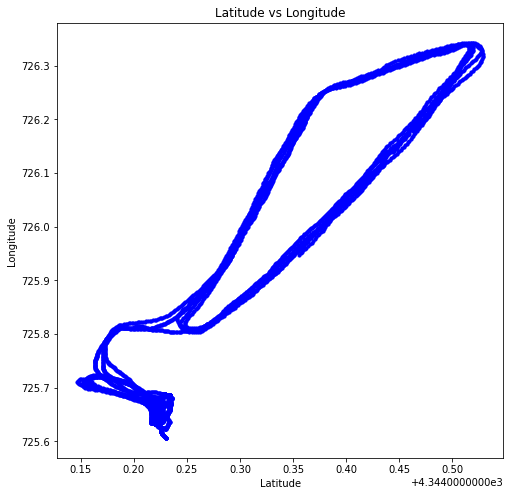

In [13]:
lib.plot_data(filtered_df, x_as, y_as)

In [18]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def bereken_theoretische_afstand(energie, massa):
    """
    Bereken de theoretische afstand die een boot zou kunnen afleggen.

    Parameters:
    energie (float): Beschikbare energie in joules.
    massa (float): Massa van de boot in kilogram.

    Returns:
    float: De theoretische afstand in meters.
    """
    if energie <= 0:
        return 0
    # Bereken de maximale snelheid vanuit de energie en massa
    vmax = math.sqrt((2 * energie) / massa)
    
    # Bereken de theoretische afstand
    afstand = (2 / 3) * vmax
    
    return afstand

# Laad de data
data = filtered_df

# Verwerk het dataframe om cumulatieve theoretische afstanden te berekenen
# Veronderstel dat de massa constant is (1000 kg), en energie is 'Totale accu stroom gefilterd'
massa_boot = 1000  # in kilogram

# Voeg een kolom toe voor cumulatieve energie en bereken cumulatieve afstand
if 'Totale accu stroom gefilterd' in data.columns:
    data['cumulatieve_energie'] = data['Totale accu stroom gefilterd'].cumsum()
    data['theoretische_afstand'] = data.apply(
        lambda row: bereken_theoretische_afstand(row['cumulatieve_energie'], massa_boot),
        axis=1
    )
    
    # Bereken de werkelijke afgelegde afstand op basis van 'Snelheid over de grond in km/h'
    if 'Snelheid over de grond in km/h' in data.columns:
        data['snelheid_m_per_s'] = data['Snelheid over de grond in km/h'] * (1000 / 3600)  # omzetten naar m/s
        tijd_verschil = data.index.to_series().diff().fillna(0).astype(float)  # neem index verschil als tijdsverschil in seconden
        data['werkelijke_afstand'] = (data['snelheid_m_per_s'] * tijd_verschil).cumsum()
    else:
        print("Kolom 'Snelheid over de grond in km/h' niet gevonden in de dataset.")
    
    # Plot de theoretische afstand en de werkelijke data
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['theoretische_afstand'], label='Theoretische Afstand', color='blue')
    if 'werkelijke_afstand' in data.columns:
        plt.plot(data.index, data['werkelijke_afstand'], label='Werkelijke Afstand', color='red')
    else:
        print("Kolom 'Werkelijke Afstand' niet gevonden in de dataset.")
    
    plt.xlabel('Tijd (s)')
    plt.ylabel('Afstand (m)')
    plt.title('Vergelijking tussen Theoretische en Werkelijke Afstand van de Boot')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(data[['Totale accu stroom gefilterd', 'cumulatieve_energie', 'theoretische_afstand', 'werkelijke_afstand']])
else:
    print("Kolom 'Totale accu stroom gefilterd' niet gevonden in de dataset.")

<ipython-input-18-955631bee5d7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cumulatieve_energie'] = data['Totale accu stroom gefilterd'].cumsum()
<ipython-input-18-955631bee5d7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['theoretische_afstand'] = data.apply(
<ipython-input-18-955631bee5d7>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

TypeError: value should be a 'Timedelta', 'NaT', or array of those. Got 'int' instead.